# Imports

In [1]:
import math
import pandas as pd
import numpy  as  np
import seaborn as sns
import inflection
import datetime
import scipy.stats as stats

from matplotlib import pyplot as plt
from matplotlib import gridspec
from IPython.display import Image

# Loading Data

In [14]:
df_sales_raw = pd.read_csv("./data/train.csv", low_memory=False)
df_store_raw = pd.read_csv("./data/store.csv", low_memory=False)

# merge
df_raw = pd.merge(df_sales_raw, df_store_raw, how='left', on='Store')

In [15]:
df_raw

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1017205,1112,2,2013-01-01,0,0,0,0,a,1,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1017206,1113,2,2013-01-01,0,0,0,0,a,1,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1017207,1114,2,2013-01-01,0,0,0,0,a,1,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


# <span style="color: orange;">1.0.</span> Transformações iniciais dos Dados

In [16]:
df1 = df_raw.copy()

## <span style="color: orange;">1.1.</span> Renomear as Colunas

In [17]:
# Renomear as colunas para o estilo sanke_case
df1.columns = [inflection.underscore(col) for col in df1.columns]

In [18]:
df1.head().T

,0,1,2,3,4
store,1,2,3,4,5
day_of_week,5,5,5,5,5
date,2015-07-31,2015-07-31,2015-07-31,2015-07-31,2015-07-31
sales,5263,6064,8314,13995,4822
customers,555,625,821,1498,559
open,1,1,1,1,1
promo,1,1,1,1,1
state_holiday,0,0,0,0,0
school_holiday,1,1,1,1,1
store_type,c,a,a,c,a


## <span style="color: orange;">1.2.</span> Data Dimension

In [19]:
print('Number of Rows {}'.format(df1.shape[0]))
print('Number of Cols {}'.format(df1.shape[1]))

Number of Rows 1017209
Number of Cols 18


## <span style="color: orange;">1.3.</span> Tipo dos Dados

In [20]:
df1['date'] = pd.to_datetime(df1['date'])
df1.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month           float64
competition_open_since_year            float64
promo2                                   int64
promo2_since_week                      float64
promo2_since_year                      float64
promo_interval                          object
dtype: object

## <span style="color: orange;">1.4.</span> Verifica NA

In [21]:
df1.isna().sum()

store                                0
day_of_week                          0
date                                 0
sales                                0
customers                            0
open                                 0
promo                                0
state_holiday                        0
school_holiday                       0
store_type                           0
assortment                           0
competition_distance              2642
competition_open_since_month    323348
competition_open_since_year     323348
promo2                               0
promo2_since_week               508031
promo2_since_year               508031
promo_interval                  508031
dtype: int64

## <span style="color: orange;">1.5.</span> Preencher os NA

In [22]:
# competition_distance -  suposição que quando competition_distance é NA significa que a loja não tem um competido próximo
df1['competition_distance'] = df1['competition_distance'].apply(lambda x: 200000 if pd.isna(x) else x)
          
# competition_open_since_month  
df1['competition_open_since_month'] = df1[['competition_open_since_month', 'date']].apply(lambda x: x['date'].month if math.isnan(x['competition_open_since_month']) else x['competition_open_since_month'], axis=1)

# competition_open_since_year 
df1['competition_open_since_year'] = df1[['competition_open_since_year', 'date']].apply(lambda x: x['date'].year if math.isnan(x['competition_open_since_year']) else x['competition_open_since_year'], axis=1)

# promo2_since_week 
df1['promo2_since_week'] = df1[['promo2_since_week', 'date']].apply(lambda x: x['date'].week if math.isnan(x['promo2_since_week']) else x['promo2_since_week'], axis=1)            

# promo2_since_year   
df1['promo2_since_year'] = df1[['promo2_since_year', 'date']].apply(lambda x: x['date'].year if math.isnan(x['promo2_since_year']) else x['promo2_since_year'], axis=1)

# promo_interval
df1['promo_interval'].fillna(0, inplace=True)

month_map = {1 : 'Jan', 2 : 'Fev', 3 : 'Mar', 4 : 'Apr', 5 : 'May', 6 : 'Jun', 7 : 'Jul', 8 : 'Aug', 9 : 'Sep', 10 : 'Oct', 11 : 'Nov', 12 : 'Dec'}
df1['month_map'] = df1['date'].dt.month.map(month_map)

df1['is_promo'] = df1[['promo_interval', 'month_map']].apply(lambda x: 0 if x['promo_interval'] == 0 else
                                                                       1 if x['month_map'] in x['promo_interval'].split(',') else
                                                                       0, axis =1) 


## <span style="color: orange;">1.6.</span> Alterar Tipos

Ao criar novas colunas é importante checar de novo o tipo das colunas, pois o resultado das operações pode ter alterado o tipo original.

In [23]:
df1['competition_open_since_month'] = df1['competition_open_since_month'].astype(int)
df1['competition_open_since_year'] = df1['competition_open_since_year'].astype(int)
df1['promo2_since_week'] = df1['promo2_since_week'].astype(int)
df1['promo2_since_year'] = df1['promo2_since_year'].astype(int)

# <span style="color: orange;">2.0.</span> Estatística Descritiva

In [24]:
df2 = df1.copy()

In [25]:
num_attributes = df2.select_dtypes(include=['int64', 'float64'])
cat_attributes = df2.select_dtypes(exclude=['int64', 'float64', 'datetime64[ns]'])

## <span style="color: orange;">2.1.</span> Numerical Attributes

In [26]:
def get_first_order_statistics(df):
    # Central Tendency Metrics
    mean = pd.DataFrame(df.apply(np.mean)).T
    median = pd.DataFrame(df.apply(np.median)).T

    # Dispersion Metrics
    min_ = pd.DataFrame(df.apply(min)).T
    max_ = pd.DataFrame(df.apply(max)).T
    range_ = pd.DataFrame(df.apply(lambda x: x.max() - x.min())).T
    std = pd.DataFrame(df.apply(np.std)).T
    skew = pd.DataFrame(df.apply(lambda x: x.skew())).T
    kurtosis = pd.DataFrame(df.apply(lambda x: x.kurtosis())).T

    # Metrics Concatenation
    m = pd.concat([min_, max_, range_, mean, median, std, skew, kurtosis]).T.reset_index()
    m.columns = ['attributes', 'min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis']
    
    return m

In [27]:
get_first_order_statistics(num_attributes)

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,store,1.0,1115.0,1114.0,558.429727,558.0,321.908493,-0.000955,-1.200524
1,day_of_week,1.0,7.0,6.0,3.998341,4.0,1.997390,0.001593,-1.246873
2,sales,0.0,41551.0,41551.0,5773.818972,5744.0,3849.924283,0.641460,1.778375
3,customers,0.0,7388.0,7388.0,633.145946,609.0,464.411506,1.598650,7.091773
4,open,0.0,1.0,1.0,0.830107,1.0,0.375539,-1.758045,1.090723
5,promo,0.0,1.0,1.0,0.381515,0.0,0.485758,0.487838,-1.762018
6,school_holiday,0.0,1.0,1.0,0.178647,0.0,0.383056,1.677842,0.815154
7,competition_distance,20.0,200000.0,199980.0,5935.442677,2330.0,12547.646829,10.242344,147.789712
8,competition_open_since_month,1.0,12.0,11.0,6.786849,7.0,3.311085,-0.042076,-1.232607
9,competition_open_since_year,1900.0,2015.0,115.0,2010.324840,2012.0,5.515591,-7.235657,124.071304


- Rossmann was founded in 1972. Values of Competition_open_since_year lower than 1972 indicate the years when closest competitors, from other pharmacy chains, were opened.

- The competition_distance variable has high positive values of skew and kurtosis, indicating that the distribution is skewed right and has a large tail.

- There is a vast difference in the range in some features. Higher ranging numbers have superiority of some sort. So these more significant number starts playing a more decisive role while training some models. It's needed to apply some sort of scaling over the features.

## <span style="color: orange;">2.2.</span> Categorical Attributes

In [28]:
 # How many levels there is  in each categorical attribute
cat_attributes.nunique()

state_holiday      4
store_type         4
assortment         3
promo_interval     4
month_map         12
dtype: int64

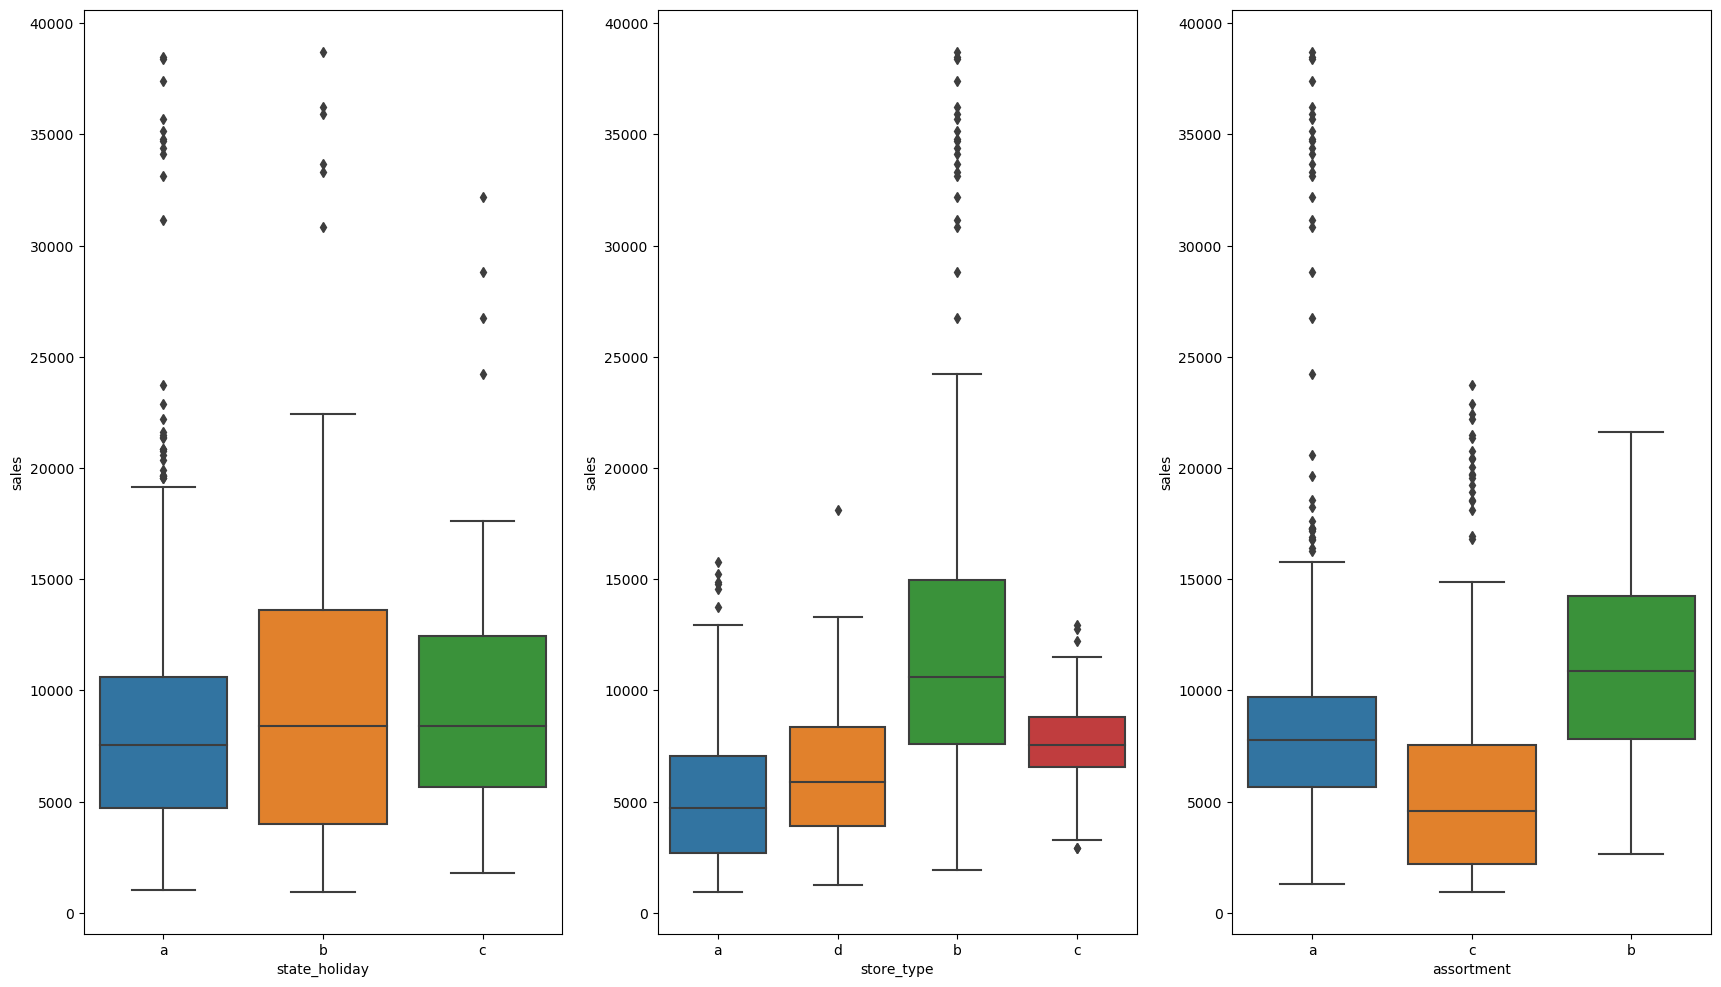

In [29]:
# Filtrar apenas registros em dias comerciais com vendas superiores a 0
aux1 =df1[(df1.state_holiday !='0' ) & (df1.sales > 0)]

# Boxplots são úteis para vizualizar medidas de dispersão e tendencia central em um gráfico apenas
# Linha do meio é a mediana
# box limitado pelos 25th quartil and 75th quartil
# Outliers fora do boxplot

fig = plt.figure(figsize=(21,12))
specs = gridspec.GridSpec(ncols=3, nrows=1, figure = fig)

ax1 = fig.add_subplot(specs[0,0])  # First row
ax2 = fig.add_subplot(specs[0,1])  # First row Second Column
ax3 = fig.add_subplot(specs[0,2])  # First row Third Column

sns.boxplot(x='state_holiday', y='sales', data=aux1, ax=ax1)

sns.boxplot(x='store_type', y='sales', data=aux1, ax=ax2)

sns.boxplot(x='assortment', y='sales', data=aux1, ax=ax3)

# <span style="color: orange;">3.0.</span> Feature Engineering

## <span style="color: orange;">3.1.</span> Mind Map Hypothesis

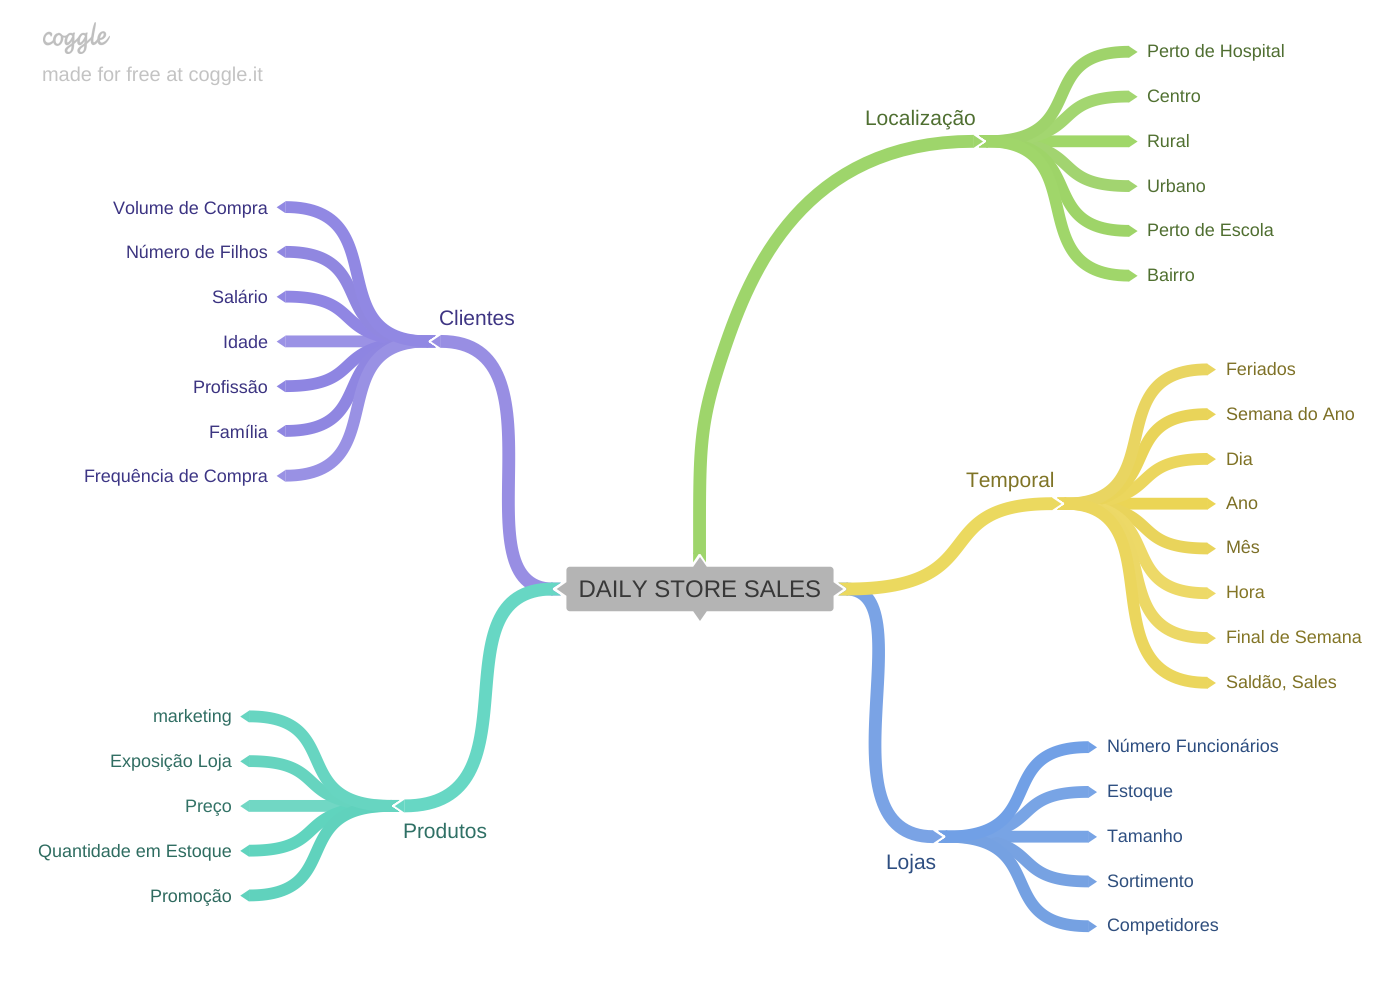

In [30]:
Image("./img/mind_map_hypothesis.png")

## <span style="color: orange;">3.2.</span> Creation of Hypotheses

### <span style="color: orange;">3.2.1 </span> Store Hypotheses

**1.** Lojas com quadro de funcionários deveriam vender mais.

**2.** Lojas com maior capacidade de estoque deveriam vender mais.

**3.** Lojas com maior porte deveriam vender mais.

**4.** Lojas com maior sortimento deveriam vender mais.

**5.** Lojas com competidores mais próximos deveriam vender menos.

**6.** Lojas com competidores à mais tempo deveriam vender mais.

### <span style="color: orange;">3.2.2 </span> Product Hypotheses

**1.** Lojas que investem mais em marketing deveriam vender mais

**2.** Lojas que expõem mais os produtos na vitrine deveriam vender mais

**3.** Lojas com preços menores dos produtos deveriam vender mais.

**4.** Lojas com promoções mais agressivas (descontos maiores), deveriam vender mais

**5.** Lojas com promoções dos produtos por mais tempo deveriam vender mais.

**6.** Lojas com mais dias de promoção deveriam vender mais

**7.** Lojas com mais promoções consecutivas deveriam vender mais

### <span style="color: orange;">3.2.3 </span> Time Hypotheses

**1.** Lojas abertas durante o feriado de Natal deveriam vender mais.

**2.** Lojas deveriam vender mais ao longo dos anos.

**3.** Lojas deveriam vender mais no segundo semestre do ano.

**4.** Lojas deveriam vender depois do dia 10 de cada mês.

**5.** Lojas deveriam vender menos nos finais de semana.

**6.** Lojas deveriam vender menos durante os feriados escolares.

## <span style="color: orange;">3.3 </span> Final List of Hypotheses

**1.** Lojas com maior sortimento deveriam vender mais.

**2.** Lojas com competidores mais próximos deveriam vender menos.

**3.** Lojas com competidores à mais tempo deveriam vender mais.

**4.** Lojas com promoções dos produtos por mais tempo deveriam vender mais.

**5.** Lojas com mais dias de promoção deveriam vender mais

**6.** Lojas com mais promoções consecutivas deveriam vender mais

**7.** Lojas abertas durante o feriado de Natal deveriam vender mais.

**8.** Lojas deveriam vender mais ao longo dos anos.

**9.** Lojas deveriam vender mais no segundo semestre do ano.

**10.** Lojas deveriam vender depois do dia 10 de cada mês.

**11.** Lojas deveriam vender menos nos finais de semana.

**12.** Lojas deveriam vender menos durante os feriados escolares.

## <span style="color: orange;">3.4 </span> Feature Engineering

In [68]:
df3 = df2.copy()

In [69]:
df2['competition_since'] = df2.apply(lambda x: datetime.datetime(year=x['competition_open_since_year'], month=x['competition_open_since_month'], day=1), axis=1)
df2['competition_time_month'] = ((df2['date'] - df2['competition_since'])/np.timedelta64(1,'M'))

In [70]:
# year
df3['year'] = df3['date'].dt.year

# month
df3['month'] = df3['date'].dt.month

# day
df3['day'] = df3['date'].dt.day

# week of year
df3['week_of_year'] = df3['date'].dt.weekofyear

# year week
df3['year_week'] = df3['date'].dt.strftime('%Y-%W')

# competition since
df3['competition_since'] = df3.apply(lambda x: datetime.datetime(year=x['competition_open_since_year'], month=x['competition_open_since_month'], day=1), axis=1)
df3['competition_time_month'] = ((df3['date'] - df3['competition_since'])/np.timedelta64(1,'M'))

# promo since
df3['promo_since'] = pd.to_datetime(df3['promo2_since_year'].astype(str) + '-' + df3['promo2_since_week'].astype(str) + '-1', 
                                    format='%Y-%W-%w') - pd.Timedelta(days=7)

df3['promo_time_week'] = ((df3['date'] - df3['promo_since'])/np.timedelta64(1,'W'))

# assortment
df3['assortment'] = df3['assortment'].apply(lambda x: 'basic' if x == 'a' else 'extra' if x == 'b' else 'extended')

# state_holiday
df3['state_holiday'] = df3['state_holiday'].apply(lambda x: 'public_holiday' if x == 'a' else 'easter_holiday' if x == 'b' else 'christmas' if x == 'c' else 'regular_day')

# <span style="color: orange;">4.0.</span> Feature Filtering

## <span style="color: orange;">4.1.</span> Rows Filtering

In [71]:
df4 = df3.copy()

In [72]:
# There is no sales on closed stores
df4[(df4['open'] == 0) & (df4['sales'] > 0)] 

,store,day_of_week,date,sales,customers,open,promo,state_holiday,school_holiday,store_type,...,is_promo,competition_since,competition_time_month,year,month,day,week_of_year,year_week,promo_since,promo_time_week


In [73]:
df4 = df4[(df4['open'] != 0) & (df4['sales'] > 0)]

## <span style="color: orange;">4.2.</span> Columns Filtering

In [74]:
df4.columns

Index(['store', 'day_of_week', 'date', 'sales', 'customers', 'open', 'promo',
       'state_holiday', 'school_holiday', 'store_type', 'assortment',
       'competition_distance', 'competition_open_since_month',
       'competition_open_since_year', 'promo2', 'promo2_since_week',
       'promo2_since_year', 'promo_interval', 'month_map', 'is_promo',
       'competition_since', 'competition_time_month', 'year', 'month', 'day',
       'week_of_year', 'year_week', 'promo_since', 'promo_time_week'],
      dtype='object')

In [75]:
# Para realizar previsão de vendas teria que ter a quantidade de customers no futuro
# 'open' foi removida pois não contem informação a ser aprendida
# 'promo_interval', 'month_map' foram removidas, pois a partir das duas foi criada a variável is_promo (numérica)
cols_drop = ['customers', 'open', 'promo_interval', 'month_map']
df4 = df4.drop(cols_drop, axis=1)

In [76]:
df4.to_csv('dataframes/df4.csv', index=False)

# <span style="color: orange;">5.0.</span> Split Into Training and Test Set

In [2]:
df5 = pd.read_csv('./dataframes/df4.csv', parse_dates=['date', 'competition_since', 'promo_since'])

Since we are working with a temporal problem, we cannot randomly select which rows will belong to the training set and which rows will belong to the testing set. Since the goal is to forecast sales for the next 6 weeks, the last 6 weeks of sales will be used as testing and the previous 6 weeks will be used as training.

In [4]:
df5[['store', 'date']].groupby('store').max()['date'].max() - datetime.timedelta(days=6*7)

Timestamp('2015-06-19 00:00:00')

In [5]:
data_limit = df5[['store', 'date']].groupby('store').max()['date'].max() - datetime.timedelta(days=6*7)

# df_sample = df6.sample(n=400000)

# training dataset
X_train = df5[df5['date'] < data_limit]
y_train = X_train['sales']

# test dataset
X_test = df5[df5['date'] >= data_limit]
y_test = X_test['sales']

print('Training Min date: {}'.format(X_train['date'].min()))
print('Training Max date: {}'.format(X_train['date'].max()))

print('\nTest Min date: {}'.format(X_test['date'].min()))
print('Test Max date: {}'.format(X_test['date'].max()))

Training Min date: 2013-01-01 00:00:00
Training Max date: 2015-06-18 00:00:00

Test Min date: 2015-06-19 00:00:00
Test Max date: 2015-07-31 00:00:00


# <span style="color: orange;">6.0.</span> Exploratory Data Analysis

## <span style="color: orange;">6.1.</span> Univariate Analysis

## <span style="color: orange;">6.1.1 </span> Response Variable

In [8]:
df5.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month             int64
competition_open_since_year              int64
promo2                                   int64
promo2_since_week                        int64
promo2_since_year                        int64
is_promo                                 int64
competition_since               datetime64[ns]
competition_time_month                 float64
year                                     int64
month                                    int64
day                                      int64
week_of_year 

ValueError: Multi-dimensional indexing (e.g. `obj[:, None]`) is no longer supported. Convert to a numpy array before indexing instead.

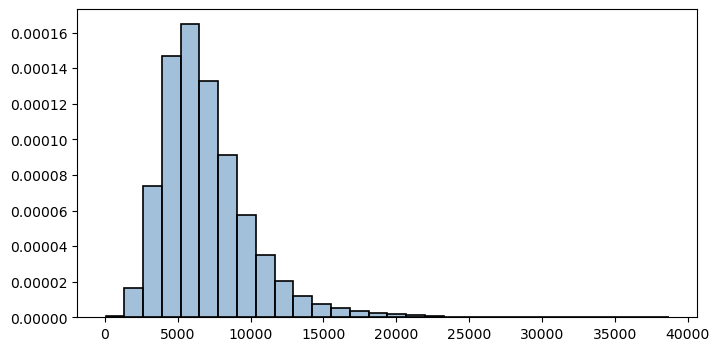

In [7]:
# Criando o histograma e a curva de densidade
plt.figure(figsize=(8, 4))
sns.histplot(X_train['sales'], bins=30, kde=True, stat="density", color='steelblue', edgecolor='black', linewidth=1.2)
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.title('Histogram with Density Curve')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

## <span style="color: orange;">6.1.2 </span> Numerical Variables

/tmp/ipykernel_37369/2232118446.py:6: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  num_attributes.hist(bins=25, ax=ax);


AttributeError: 'SubplotSpec' object has no attribute 'rowspan'

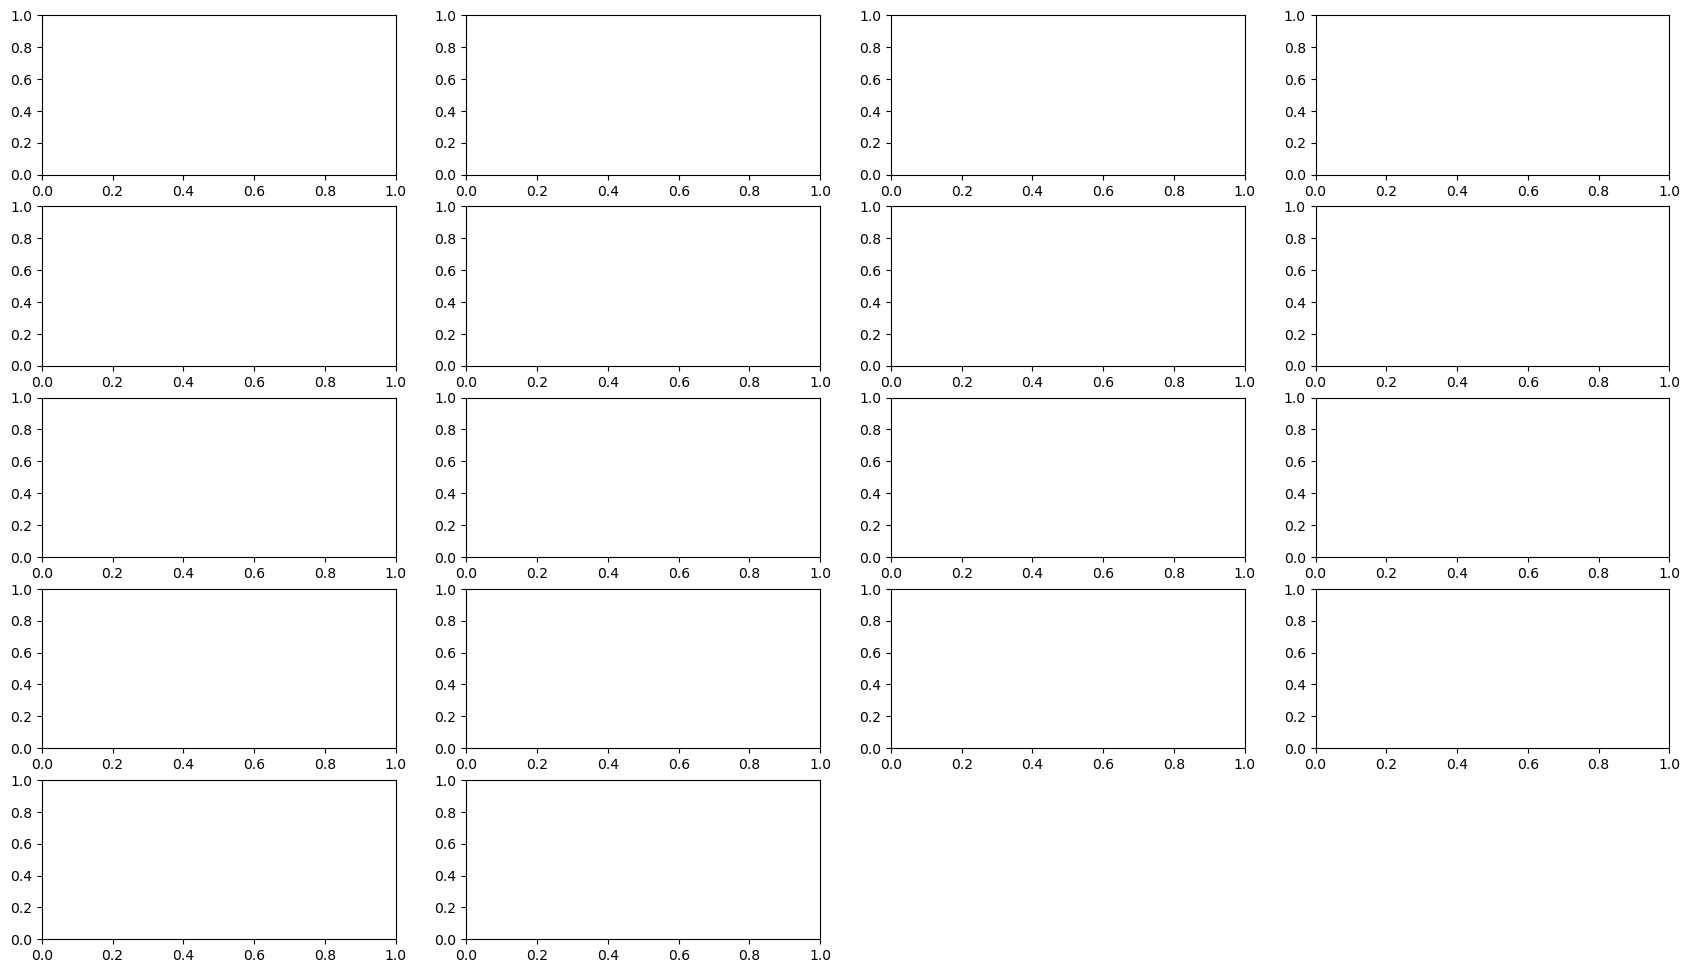

In [9]:
num_attributes = X_train.select_dtypes(include=['int64', 'float64']);

fig = plt.figure(figsize=(21,12));
ax = fig.add_subplot();

num_attributes.hist(bins=25, ax=ax);

## <span style="color: orange;">6.1.2 </span> Categorical Variables

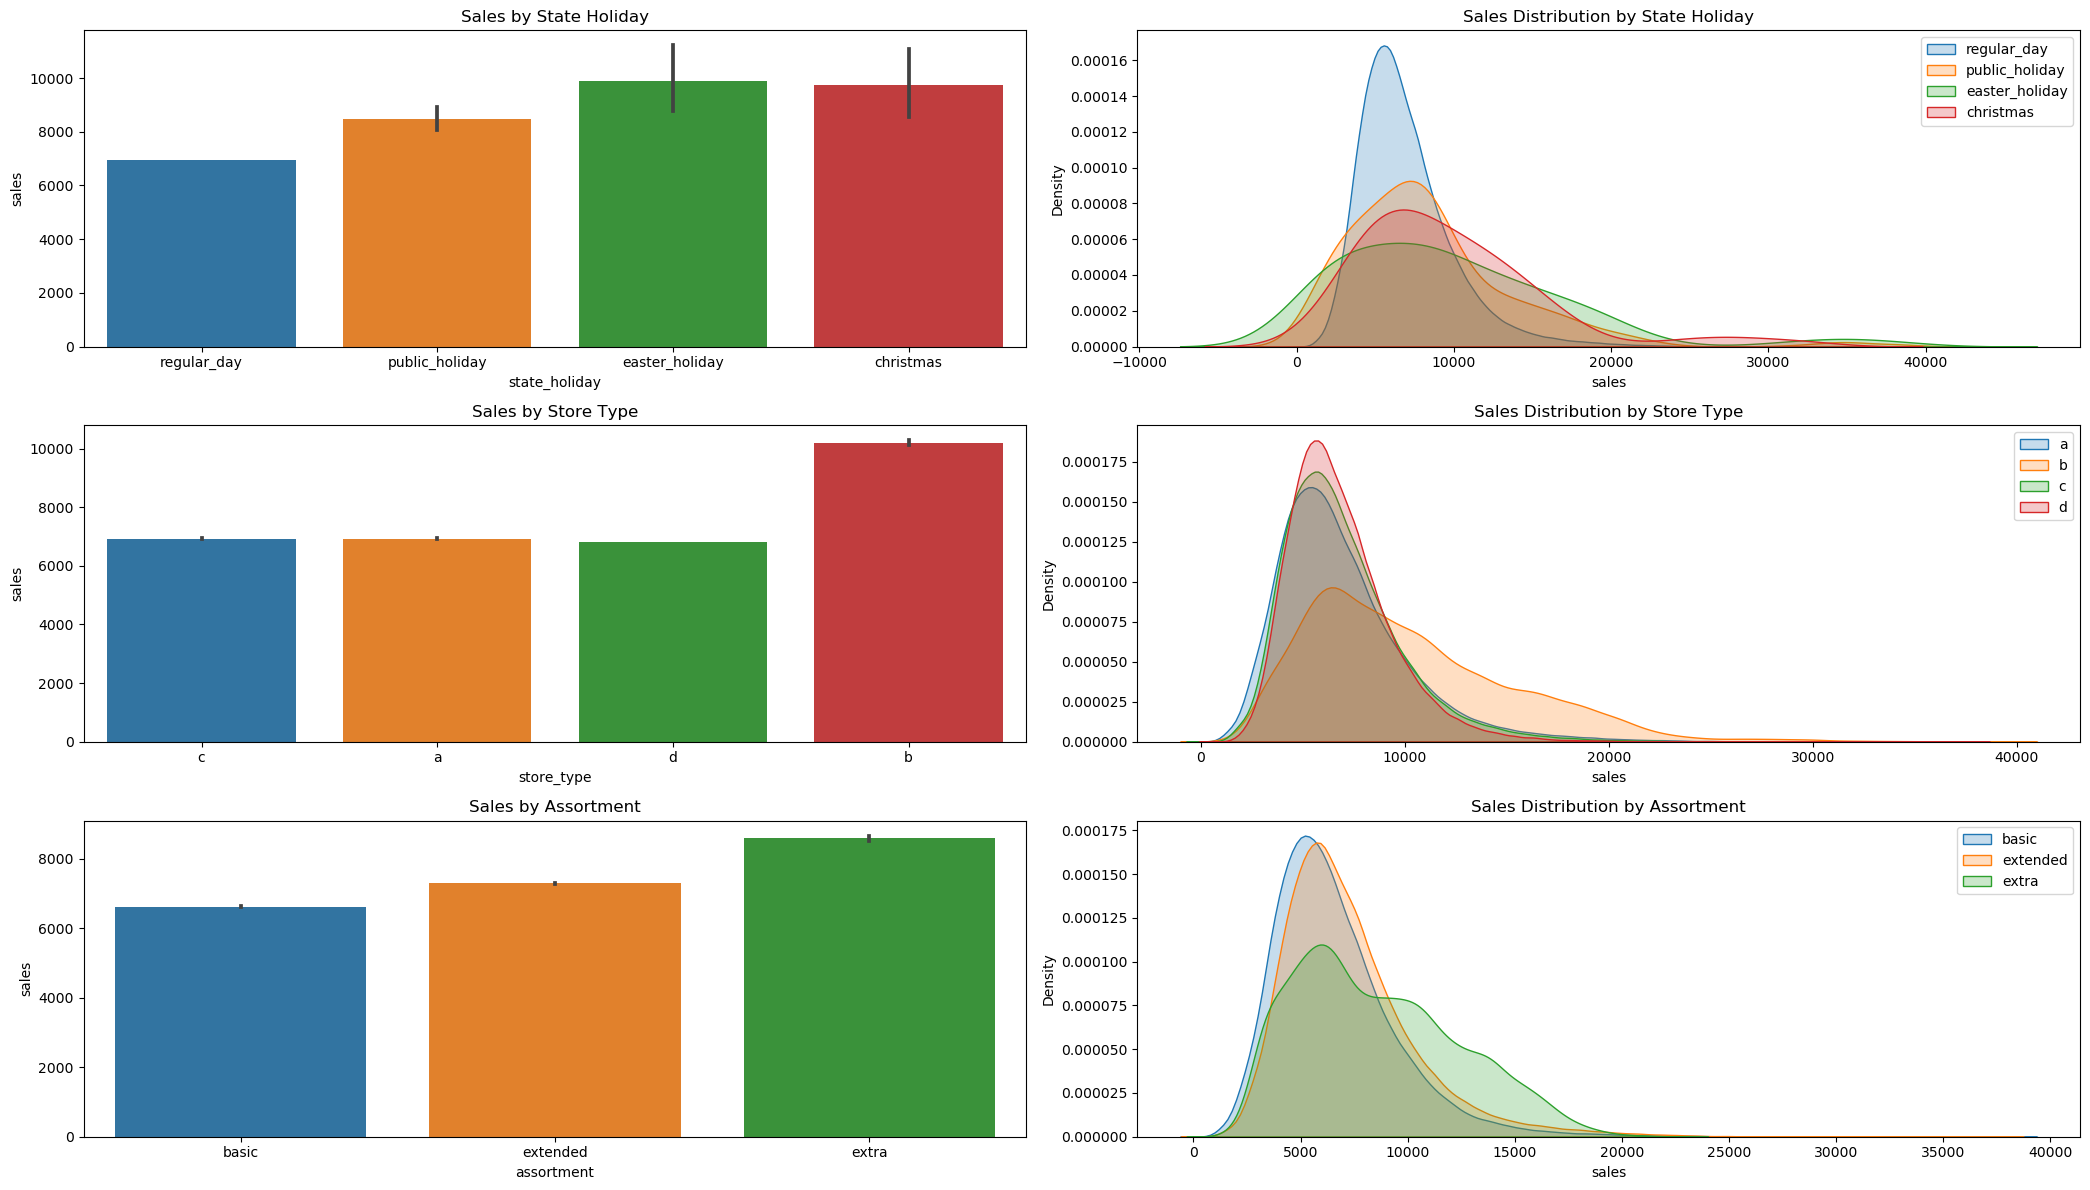

In [100]:
fig = plt.figure(figsize=(21,12))

plt.subplot(3, 2, 1)
sns.barplot(x='state_holiday', y='sales', data=X_train)
plt.title('Sales by State Holiday')

# plots de densidade de distribuição
plt.subplot(3, 2, 2)
sns.kdeplot(X_train[X_train['state_holiday'] == 'regular_day']['sales'], label='regular_day', fill= True)
sns.kdeplot(X_train[X_train['state_holiday'] == 'public_holiday']['sales'], label='public_holiday', fill= True)
sns.kdeplot(X_train[X_train['state_holiday'] == 'easter_holiday']['sales'], label='easter_holiday', fill= True)
sns.kdeplot(X_train[X_train['state_holiday'] == 'christmas']['sales'], label='christmas', fill= True)
plt.legend()
plt.title('Sales Distribution by State Holiday')

plt.subplot(3, 2, 3)
sns.barplot(x='store_type', y='sales', data=X_train)
plt.title('Sales by Store Type')

plt.subplot(3, 2, 4)
# plots de densidade de distribuição
sns.kdeplot(X_train[X_train['store_type'] == 'a']['sales'], label='a', fill= True)
sns.kdeplot(X_train[X_train['store_type'] == 'b']['sales'], label='b', fill= True)
sns.kdeplot(X_train[X_train['store_type'] == 'c']['sales'], label='c', fill= True)
sns.kdeplot(X_train[X_train['store_type'] == 'd']['sales'], label='d', fill= True)
plt.legend()
plt.title('Sales Distribution by Store Type')

plt.subplot(3, 2, 5)
sns.barplot(x='assortment', y='sales', data=X_train)
plt.title('Sales by Assortment')

# plots de densidade de distribuição
plt.subplot(3, 2, 6)
sns.kdeplot(X_train[X_train['assortment'] == 'basic']['sales'], label='basic', fill= True)
sns.kdeplot(X_train[X_train['assortment'] == 'extended']['sales'], label='extended', fill= True)
sns.kdeplot(X_train[X_train['assortment'] == 'extra']['sales'], label='extra', fill= True)
plt.legend()
plt.title('Sales Distribution by Assortment')

plt.tight_layout()
plt.show()

In [102]:
X_train['assortment'].unique()

array(['basic', 'extended', 'extra'], dtype=object)

## <span style="color: orange;">6.2.</span> Bivariate Analysis

### **H1.** On average, stores with a larger assortment should sell more.

**True** stores with a larger assortment sell more on average

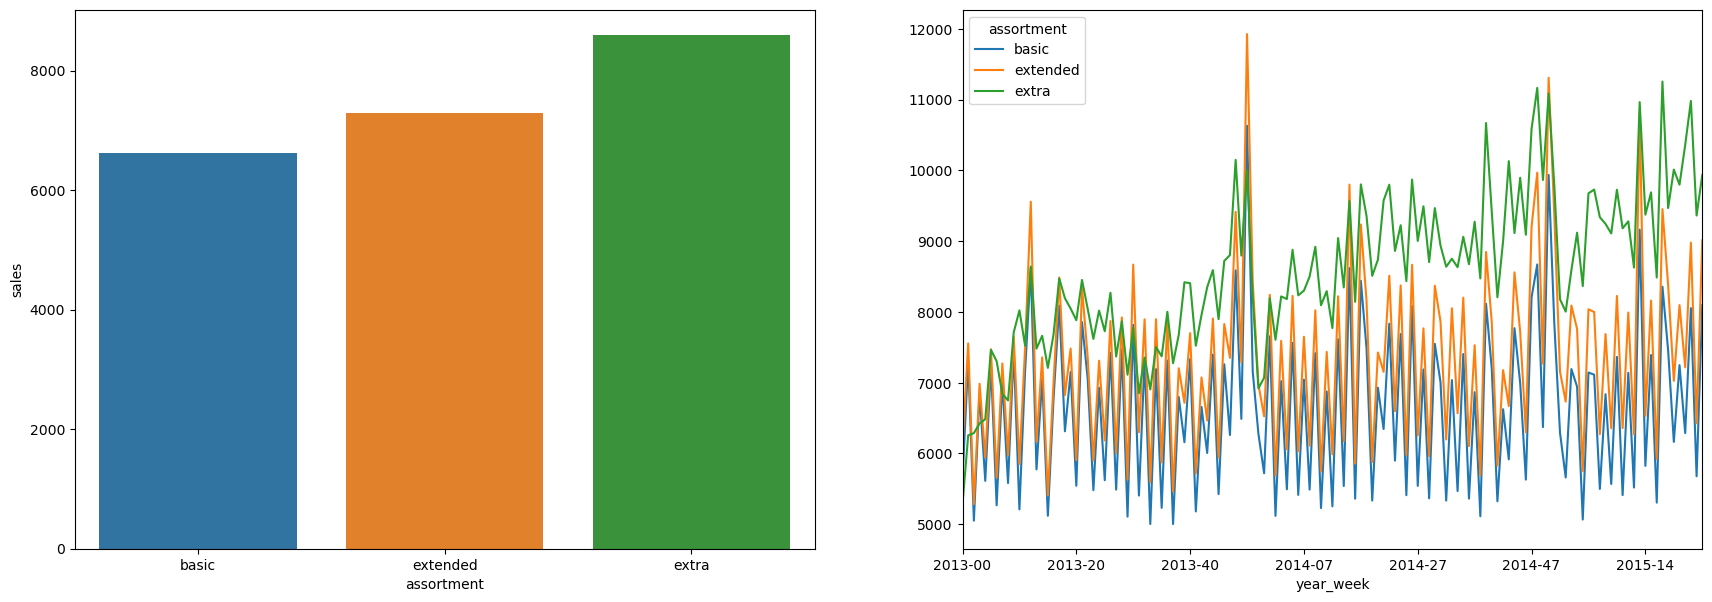

In [109]:
fig = plt.figure(figsize=(21,7))
specs = gridspec.GridSpec(ncols=2, nrows=1, figure = fig)

ax1 = fig.add_subplot(specs[0,0])  
ax2 = fig.add_subplot(specs[0,1])   


aux1 = X_train[['assortment', 'sales']].groupby('assortment').mean().reset_index()
sns.barplot(x='assortment', y='sales', data=aux1, ax=ax1); 

aux2 = X_train[['year_week', 'assortment', 'sales']].groupby(['year_week', 'assortment']).mean().reset_index()
aux2.pivot(index='year_week', columns='assortment', values='sales').plot(ax=ax2)

fig.savefig('./img/H1.png')

#### Hypothesis Testing

Null hypothesis (H0): Sales averages are the same for all types of assortment.
$\mu_{basic} = \mu_{extended} = \mu_{extra}$
​
 
Alternative Hypothesis (H1): At least one of the sales averages is different.

In [113]:
# Realizar o teste ANOVA
fvalue, pvalue = stats.f_oneway(
    X_train[X_train['assortment'] == 'basic']['sales'],
    X_train[X_train['assortment'] == 'extended']['sales'],
    X_train[X_train['assortment'] == 'extra']['sales']
)

print(f"F-value: {fvalue}")
print(f"P-value: {pvalue}")

# Interpretação do resultado
if pvalue < 0.05:
    print("As diferenças nas vendas médias entre os sortimentos são estatisticamente significativas (p < 0.05).")
else:
    print("Não há diferenças estatisticamente significativas nas vendas médias entre os sortimentos (p >= 0.05).")

F-value: 5707.797059631062
P-value: 0.0
As diferenças nas vendas médias entre os sortimentos são estatisticamente significativas (p < 0.05).


### **H2.** Stores with closer competitors should sell less.

**False**, there is virtually no correlation between sales and closer competitors

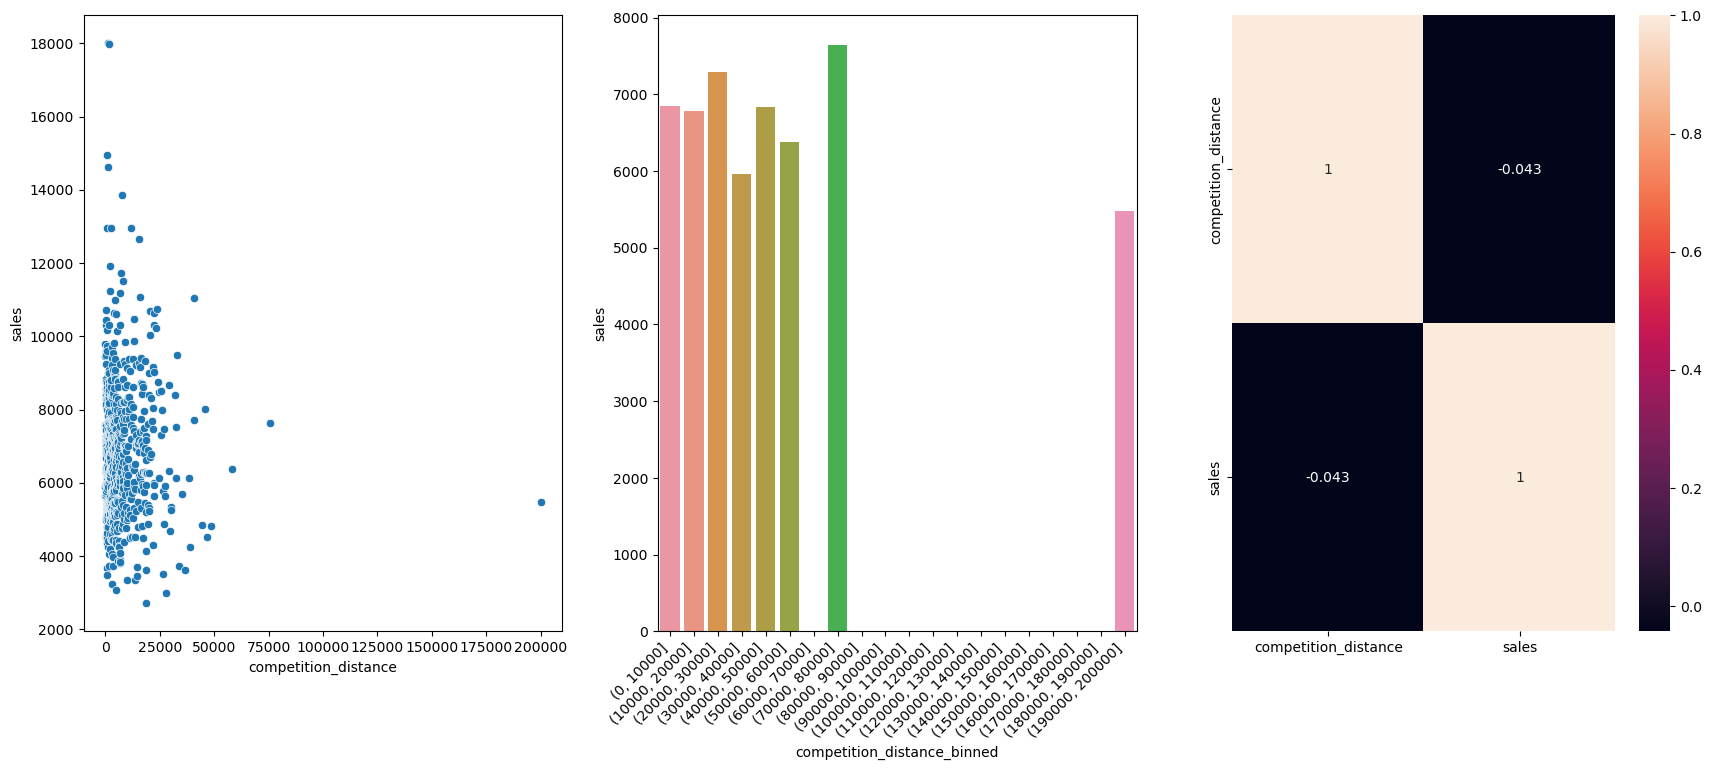

In [133]:
fig = plt.figure(figsize=(21,8))
specs = gridspec.GridSpec(ncols=3, nrows=1, figure = fig)

ax1 = fig.add_subplot(specs[0,0])  # First row 
ax2 = fig.add_subplot(specs[0,1])  # Second row 
ax3 = fig.add_subplot(specs[0,2])  # Third row 


aux1 = X_train[['competition_distance', 'sales']].groupby('competition_distance').mean().reset_index()

sns.scatterplot(data=aux1, x='competition_distance', y='sales', ax=ax1)

bins = list(np.arange(0, 210000, 10000))

aux1['competition_distance_binned'] = pd.cut(aux1['competition_distance'], bins=bins)
aux2 = aux1[['competition_distance_binned', 'sales']].groupby('competition_distance_binned').mean().reset_index()


sns.barplot(x='competition_distance_binned', y='sales', data=aux2, ax=ax2); 
ax2.set_xticklabels(labels=aux2['competition_distance_binned'], rotation=45, ha='right')

sns.heatmap(X_train[['competition_distance', 'sales']].corr(method='pearson'), annot=True, ax=ax3)

In [144]:
# Calcular correlação
correlation, p_value = stats.pearsonr(X_train['competition_distance'], X_train['sales'])
print(f'Pearson Correlation: {correlation}')
print(f'P-value: {p_value}')

Pearson Correlation: -0.04272694974602785
P-value: 5.296e-321


### **H3.** Stores with competitors that have been around for longer should sell more.

**True** stores with withcompetitors that have been around for longer sells more on average

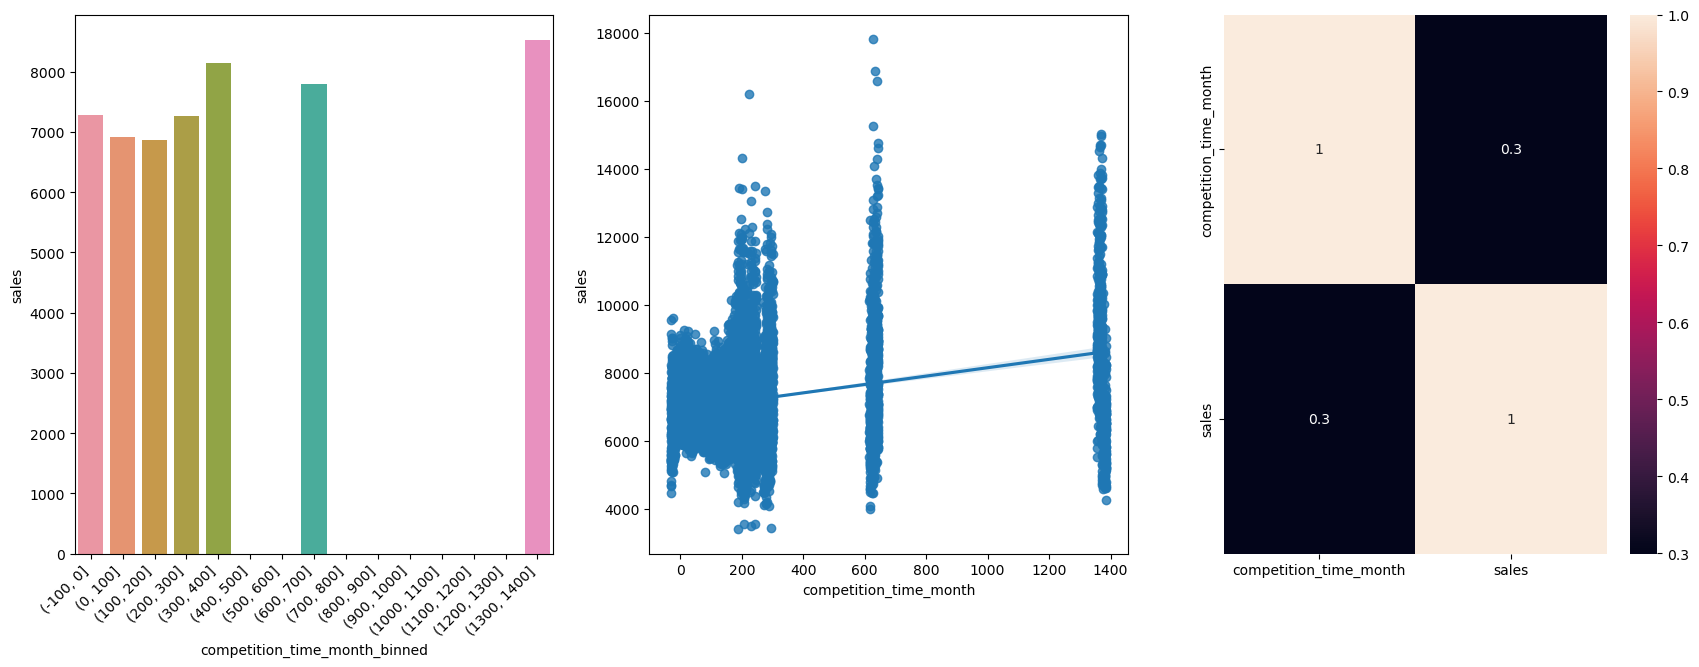

In [147]:
fig = plt.figure(figsize=(21,7))
specs = gridspec.GridSpec(ncols=3, nrows=1, figure = fig)

ax1 = fig.add_subplot(specs[0,0])  # First row 
ax2 = fig.add_subplot(specs[0,1])  # Second row 
ax3 = fig.add_subplot(specs[0,2])  # Third row 

aux1 = X_train.copy()
bins = list(np.arange(-100, 1500, 100))
aux1['competition_time_month_binned'] = pd.cut(X_train['competition_time_month'], bins=bins)
aux2 = aux1[['competition_time_month_binned', 'sales']].groupby('competition_time_month_binned').mean().reset_index()

sns.barplot( x='competition_time_month_binned', y='sales', data=aux2, ax=ax1 );
ax1.set_xticklabels(labels=aux2['competition_time_month_binned'], rotation=45, ha='right');

aux3 = aux1[['competition_time_month', 'sales']].groupby('competition_time_month').mean().reset_index()
sns.regplot(x='competition_time_month', y='sales', data=aux3, ax= ax2)

sns.heatmap(aux3.corr(method='pearson'), annot=True, ax=ax3)

### **4.** Stores with longer product promotions should sell more on average.

**True** for extended promotions and **false** for regular promotions, since for regular promotion periods the correlation is almost zero

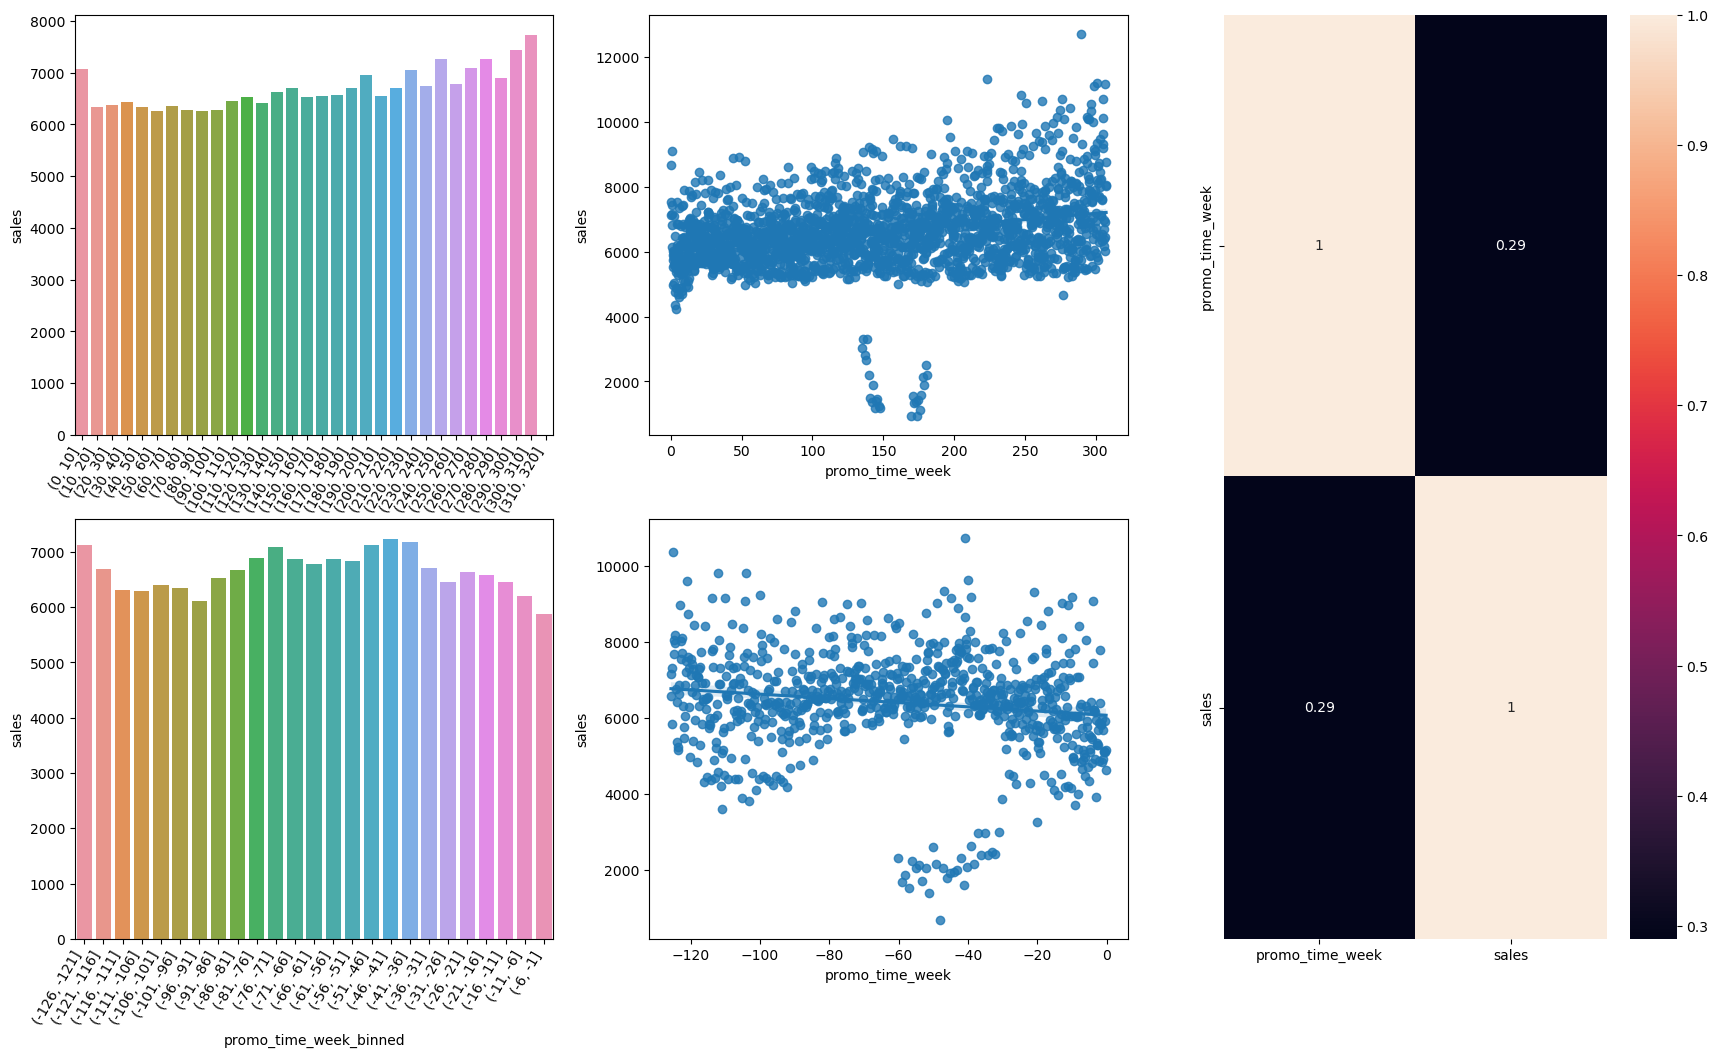

In [149]:
fig = plt.figure(figsize=(21,12))
specs = gridspec.GridSpec(ncols=3, nrows=2, figure = fig)

ax1 = fig.add_subplot(specs[0,0])
ax2 = fig.add_subplot(specs[0,1])
ax3 = fig.add_subplot(specs[1,0])
ax4 = fig.add_subplot(specs[1,1])
ax5 = fig.add_subplot(specs[:,2])

bins = list(np.arange(0, 330, 10)); # promo extendido
aux1 = X_train[X_train['promo_time_week'] >= 0].copy()
aux1['promo_time_week_binned']= pd.cut(aux1['promo_time_week'], bins=bins)
aux2 = aux1[['promo_time_week_binned', 'sales']].groupby('promo_time_week_binned').mean().reset_index()
sns.barplot( x='promo_time_week_binned', y='sales', data=aux2, ax=ax1)
ax1.set_xticklabels(labels=aux2['promo_time_week_binned'], rotation=60, ha='right')

aux3 = aux1[['promo_time_week', 'sales']].groupby('promo_time_week').mean().reset_index()
sns.regplot(x='promo_time_week', y='sales', data=aux3, ax= ax2)

bins = list(np.arange(-126, 0, 5)); # promo regular
aux4 = X_train[X_train['promo_time_week'] < 0].copy()
aux4['promo_time_week_binned'] = pd.cut(aux4['promo_time_week'], bins=bins)
aux5 = aux4[['promo_time_week_binned', 'sales']].groupby('promo_time_week_binned').mean().reset_index()
sns.barplot( x='promo_time_week_binned', y='sales', data=aux5, ax=ax3)
ax3.set_xticklabels(labels=aux5['promo_time_week_binned'], rotation=60, ha='right')

aux6 = aux4[['promo_time_week', 'sales']].groupby('promo_time_week').mean().reset_index()
sns.regplot(x='promo_time_week', y='sales', data=aux6, ax= ax4)

sns.heatmap(aux3.corr(method='pearson'), annot=True, ax=ax5);

### **6.** Stores with more consecutive promotions should sell more

**Falso** Lojas com mais promocoes consecutivas vendem menos

In [153]:
X_train[['promo', 'promo2', 'sales']].groupby(['promo', 'promo2']).mean().reset_index()

,promo,promo2,sales
0,0,0,6329.583217
1,0,1,5529.798824
2,1,0,8608.180165
3,1,1,7825.155823


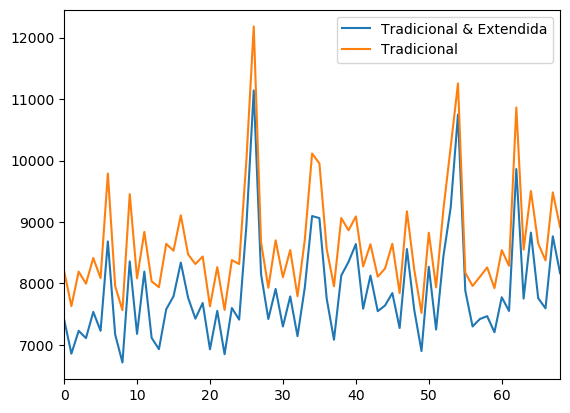

In [154]:
aux1 = X_train[( X_train['promo'] == 1 ) & ( X_train['promo2'] == 1 )][['year_week', 'sales']].groupby( 'year_week' ).mean().reset_index()
ax = aux1.plot()

aux2 = X_train[( X_train['promo'] == 1 ) & ( X_train['promo2'] == 0 )][['year_week', 'sales']].groupby( 'year_week' ).mean().reset_index()
aux2.plot( ax=ax )

ax.legend( labels=['Tradicional & Extendida', 'Tradicional']);

### **7.** Lojas abertas durante o feriado de Natal deveriam vender mais.

#### Hypothesis Testing

- H0 (null hypothesis): There is no difference in average sales between Christmas days and other days.

- H1 (alternative hypothesis): There is a difference in average sales between Christmas days and other days.

In [157]:
# Filtrar vendas durante o Natal e outros dias
sales_christmas = X_train[X_train['state_holiday'] == 'christmas']['sales']
sales_others = X_train[X_train['state_holiday'] != 'christmas']['sales']

# Realizar o teste t de Student
t_stat, p_value = stats.ttest_ind(sales_christmas, sales_others, alternative='greater')

print(f'T-statistic: {t_stat}')
print(f'P-value: {p_value}')

TypeError: ttest_ind() got an unexpected keyword argument 'alternative'

- **P-value < 0.05**: We reject the null hypothesis. There is a statistically significant difference in mean sales between Christmas days and other days.












**8.** Lojas deveriam vender mais ao longo dos anos.

**9.** Lojas deveriam vender mais no segundo semestre do ano.

**10.** Lojas deveriam vender depois do dia 10 de cada mês.

**11.** Lojas deveriam vender menos nos finais de semana.

**12.** Lojas deveriam vender menos durante os feriados escolares.

## <span style="color: orange;">6.3.</span> Multivariate Analysis

In [86]:
cat_attributes = X_train.select_dtypes(exclude=['int64', 'float64', 'datetime64[ns]'])
cat_attributes.head()

,state_holiday,store_type,assortment,year_week
41396,regular_day,c,basic,2015-24
41397,regular_day,a,basic,2015-24
41398,regular_day,a,basic,2015-24
41399,regular_day,c,extended,2015-24
41400,regular_day,a,basic,2015-24
